In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import keras
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

2025-10-31 15:27:35.407659: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#In A RNN you want to predict the next values 
df = pd.read_csv("Month_Value_1.csv")
print(df.head())

       Period       Revenue  Sales_quantity  Average_cost  \
0  01.01.2015  1.601007e+07         12729.0   1257.763541   
1  01.02.2015  1.580759e+07         11636.0   1358.507000   
2  01.03.2015  2.204715e+07         15922.0   1384.697024   
3  01.04.2015  1.881458e+07         15227.0   1235.606705   
4  01.05.2015  1.402148e+07          8620.0   1626.621765   

   The_average_annual_payroll_of_the_region  
0                                30024676.0  
1                                30024676.0  
2                                30024676.0  
3                                30024676.0  
4                                30024676.0  


In [3]:
#Eliminate Nans in the data Set
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)


/var/folders/64/_d7wbs111535lmdv26qfwp000000gn/T/ipykernel_34774/3841858164.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/var/folders/64/_d7wbs111535lmdv26qfwp000000gn/T/ipykernel_34774/3841858164.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [4]:
values = df.iloc[:, 1:5].values
features = values.shape[1]
print(f"the features that the model wants to learn: {features}")
values_of_nans = df.isna().sum().sum()
values_of_total = df.size
print(f"Total of Nans: {values_of_nans / values_of_total}")


the features that the model wants to learn: 4
Total of Nans: 0.0


In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
values_normalize = scaler.fit_transform(values)

X, y = [], []
window_size = 10
for i in range(len(values_normalize) - window_size):
    X.append(values_normalize[i: i+window_size])
    y.append(values_normalize[i + window_size])

X = np.array(X)           
y = np.array(y)          
X = X.astype(np.float32)
y = y.astype(np.float32)


In [6]:
optimizer = keras.optimizers.AdamW(learning_rate=1e-4, clipnorm=1.0)

model = keras.Sequential([
  keras.layers.LSTM(100, activation="tanh", return_sequences=True, input_shape=(X.shape[1], X.shape[2])), #Return all the sequences
  keras.layers.LSTM(50 , activation="tanh", return_sequences=True),
  keras.layers.LSTM(25, activation="tanh"),
  keras.layers.Dense(features)  
])

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 100)        │        42,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 25)             │         7,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,904 (312.12 KB)

 Trainable params: 79,904 (312.12 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.30, shuffle=False
)
print(f"X train shape: {X_train.shape}")
print(f"Y train shape: {Y_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"Y test shape: {Y_test.shape}")


X train shape: (60, 10, 4)
Y train shape: (60, 4)
X test shape: (26, 10, 4)
Y test shape: (26, 4)


In [8]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=70)
model.compile

Epoch 1/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 623ms/step - loss: 0.2787 - mae: 0.4572 - val_loss: 0.4572 - val_mae: 0.6701
Epoch 2/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.2722 - mae: 0.4510 - val_loss: 0.4449 - val_mae: 0.6610
Epoch 3/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.2660 - mae: 0.4448 - val_loss: 0.4328 - val_mae: 0.6519
Epoch 4/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.2601 - mae: 0.4387 - val_loss: 0.4209 - val_mae: 0.6427
Epoch 5/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.2542 - mae: 0.4327 - val_loss: 0.4092 - val_mae: 0.6336
Epoch 6/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.2484 - mae: 0.4268 - val_loss: 0.3977 - val_mae: 0.6244
Epoch 7/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.2429 - mae: 0.4209 - val_loss: 0.3862 - val_mae: 0.6151
Epoch 8/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.2371 - mae: 0.4148 - val_loss: 0.3749 - val_mae: 0.6057
Epoch 9/70
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.2316 - mae: 0.4088 -

<bound method Trainer.compile of <Sequential name=sequential, built=True>>

In [142]:
loss, mae = model.evaluate(X_test, Y_test)
print(f"Loss (Mean Squared Error): {loss}")
print(f"Mean Absolute Error: {mae}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0052 - mae: 0.0578
Loss (Mean Squared Error): 0.005184703506529331
Mean Absolute Error: 0.057793859392404556


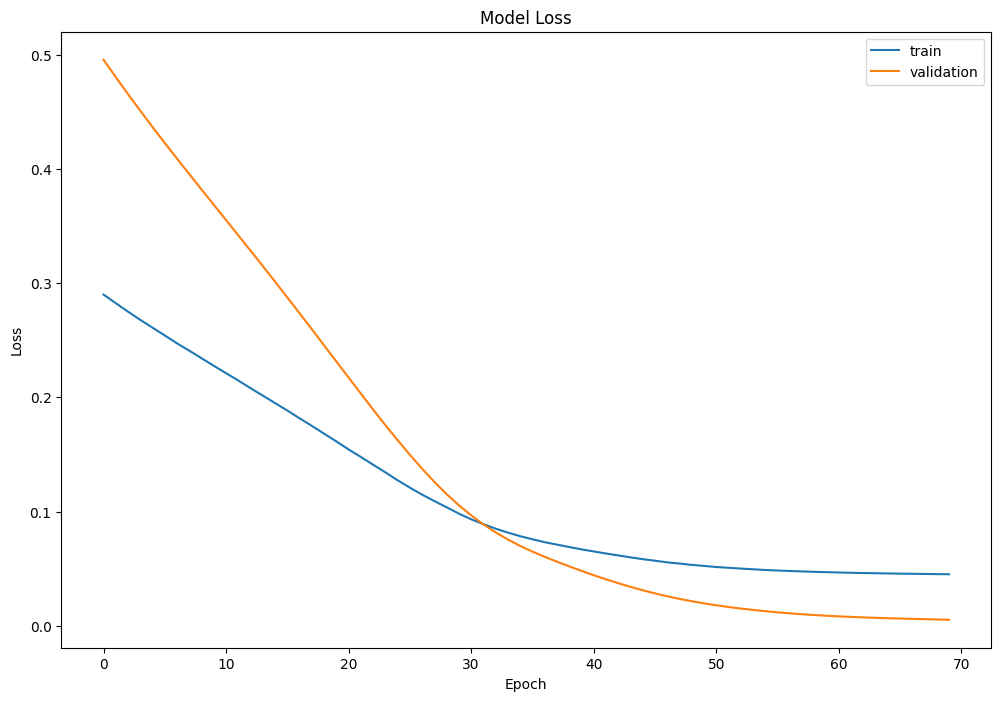

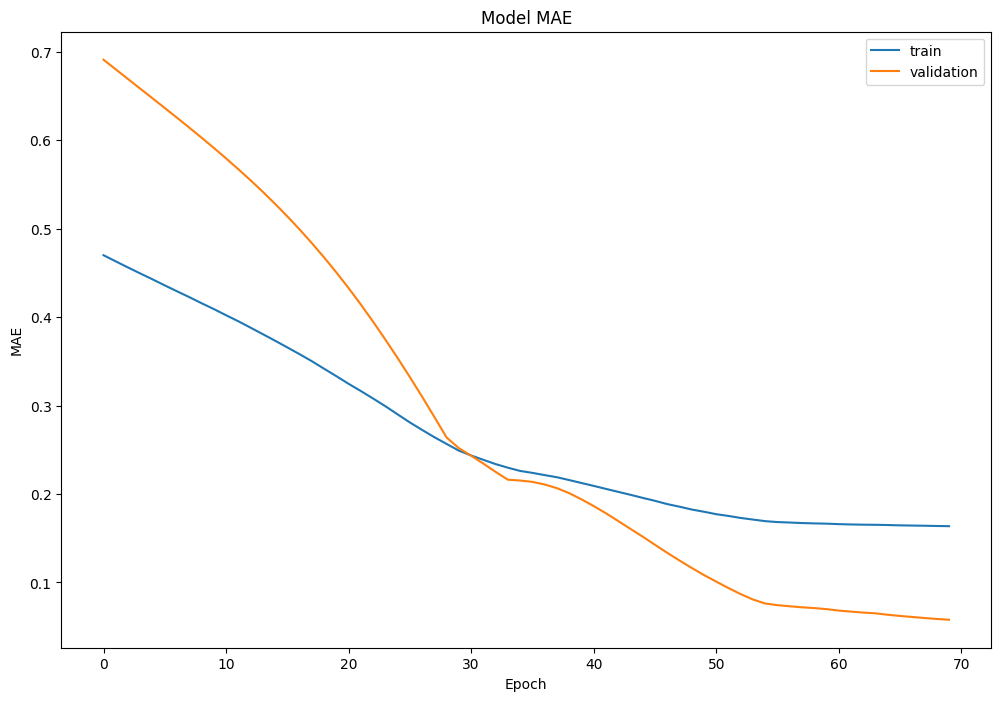

In [143]:
df_loss_acc = pd.DataFrame(history.history)

# Loss
df_loss = df_loss_acc[['loss', 'val_loss']].rename(columns={'loss':'train','val_loss':'validation'})
df_loss.plot(title='Model Loss', figsize=(12,8))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# MAE
df_mae = df_loss_acc[['mae', 'val_mae']].rename(columns={'mae':'train','val_mae':'validation'})
df_mae.plot(title='Model MAE', figsize=(12,8))
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step


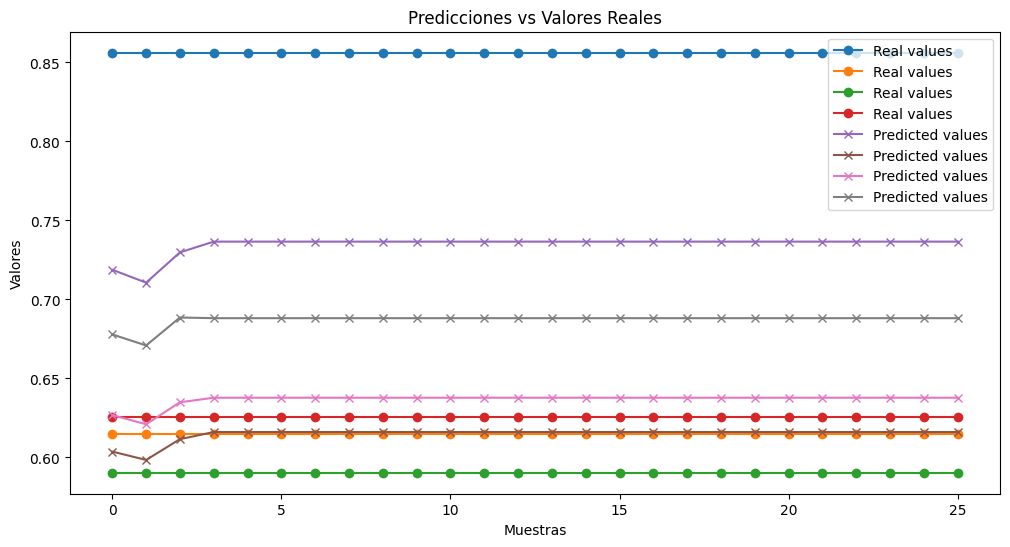

In [144]:

y_pred = model.predict(X_test)

plt.figure(figsize=(12,6))
plt.plot(Y_test, label='Real values', marker='o')
plt.plot(y_pred, label='Predicted values', marker='x')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Muestras')
plt.ylabel('Valores')
plt.legend()
plt.show()